In [1]:
import numpy as np

In [3]:
positions = np.random.randint(low=1, high=100, size=(1000, 3))
r0 = np.array([10, 10, 10])

In [10]:
print(positions[:10])

[[96 11 79]
 [17 90 11]
 [57 91 14]
 [86  9 93]
 [75  7 40]
 [ 2 39 63]
 [67 15 47]
 [44 91 33]
 [52 29 84]
 [41 36 86]]


1. Calculer la distance entre chaque points de `positions` et `r0`. La distance entre deux points $i$ et $j$, de coordonnées respectives ($x_i, y_i, z_i$) et ($x_j, y_j, z_j$), est définie comme:

$$
d(i, j) = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2 + (z_i - z_j)^2}
$$

In [13]:
x = positions[:, 0]
y = positions[:, 1]
z = positions[:, 2]

x0 = r0[0]
y0 = r0[1]
z0 = r0[2]

distances = ((x-x0)**2 + (y-y0)**2 + (z-z0)**2)**0.5

print(distances[:10])

[110.26332119  80.31189202  93.73366524 112.54332499  71.65193647
  60.94259594  68.13956266  90.80748868  87.18371408  86.09878048]


In [15]:
distances = np.sum((positions-r0)**2, axis=1)**0.5
print(distances[:10])

[110.26332119  80.31189202  93.73366524 112.54332499  71.65193647
  60.94259594  68.13956266  90.80748868  87.18371408  86.09878048]


In [21]:
differences = positions - r0
diff = differences[:10]
print(diff)

[[86  1 69]
 [ 7 80  1]
 [47 81  4]
 [76 -1 83]
 [65 -3 30]
 [-8 29 53]
 [57  5 37]
 [34 81 23]
 [42 19 74]
 [31 26 76]]


In [23]:
d2 = np.sum(diff**2)
print(d2)

76811


2. Calculer la position moyenne du nuage de points ainsi que l'écart type dans chacune des directions. L'ecart type d'une variable $X$ est définie comme:

$$
\sigma_{X} =  \sqrt{ \frac{1}{N} \sum_{i} (X -\langle X \rangle)^2}
$$

où $\langle X \rangle = 1/N \sum_i X_i$

In [34]:
pos_moyenne = np.mean(positions, axis=0)
print(pos_moyenne)

[51.421 50.501 49.479]


In [35]:
Npts = positions.shape[0]
pos_moyenne = np.sum(positions, axis=0)/Npts
print(pos_moyenne, Npts)

[51.421 50.501 49.479] 1000


In [36]:
sigma = (1./Npts * np.sum((positions-pos_moyenne)**2, axis=0))**0.5
print(sigma)

[28.77491545 28.49371859 27.87880125]


In [37]:
sigma = np.std(positions, axis=0)
print(sigma)

[28.77491545 28.49371859 27.87880125]


3. Séparer l'ensemble de points en deux parties (la première et la deuxième moitié) et calculer la distance entre la position moyenne du premier nuage de points et chaque point du 2ème nuage.

In [49]:
n = int(positions.shape[0]/2)
positions1 = positions[0:n]
positions2 = positions[n:]

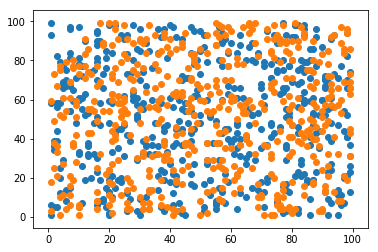

In [51]:
import matplotlib.pyplot as plt
x1, y1 = positions1[:500, 0], positions1[:500, 1]
x2, y2 = positions2[:500, 0], positions2[:500, 1]
plt.scatter(x1, y1)
plt.scatter(x2, y2);

In [54]:
moy1 = np.mean(positions1, axis=0)
print(moy1)

[51.276 49.832 48.67 ]


In [56]:
distances_2to1 = np.sum((positions2-moy1)**2, axis=1)**0.5
print(distances_2to1[:10])

[27.8646963  54.35127689 50.90042534 50.81241285 41.14872173 50.6501461
 61.04579674 32.1278275  50.03504072 53.8676647 ]


4. On considère maintenant que chaque position correspond à un objet de masse $m_i$ (tableau de shape `(1000,)` appelé `masses`). Calculer le barycentre $\vec{r}$, de coordonnée $(x, y, z)$, du nuage de points pondérés par les masses:

$$
\vec{r} = \frac{1}{m_{tot}}\sum_{i} m_i \vec{r}_i
$$

C'est-à-dire:

\begin{eqnarray}
x &=& \frac{1}{m_{tot}}\sum_{i} m_i x_i \\
y &=& \frac{1}{m_{tot}}\sum_{i} m_i y_i \\
z &=& \frac{1}{m_{tot}}\sum_{i} m_i z_i
\end{eqnarray}

où $m_{tot} = \sum_i m_i$

In [5]:
masses = np.random.random(size=1000)

[51.68661783 50.24225597 48.84416851]


In [76]:
def plot_barycentre(positions, masses):
    product = masses[:, np.newaxis] * positions
    mtot = np.sum(masses)
    bary = 1/mtot * np.sum(product, axis=0)
    x, y = positions[:, 0], positions[:, 1]
    plt.scatter(x, y, s=(masses*10)**2);
    plt.scatter(bary[0], bary[1], s=300, color='tab:red');

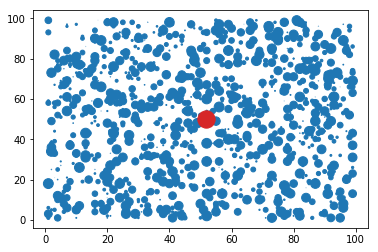

In [77]:
plot_barycentre(positions, masses)

In [78]:
x = positions[:, 0]
masses_unbalanced = masses
masses_unbalanced[x<50] = masses_unbalanced[x<50]*2

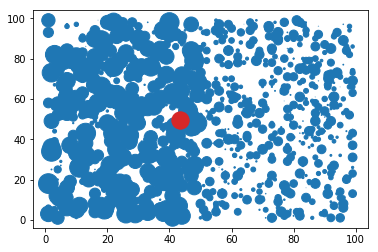

In [79]:
plot_barycentre(positions, masses_unbalanced)